In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyhmc import hmc
import time
from math import pi

%matplotlib inline

In [2]:
def vij(theta, sigma, beta, nu) :
    '''
    ___Returns the visibility for the pair of antenna {i,j}___
    
    INPUTS : 
    theta = np.array([theta_k]) : Points sources positions | theta_k = [x, y, flux]
    sigma = np.array([sigma_i,sigma_j]) : Parameters for the beam | shape = (2,)
    beta = scalar : Parameter of the baseline | shape = scalar
    nu = np.array(nu) : Frequency of observation | shape = (Nfreq,)
    
    OUTPUT : 
    Vij = [Vij.real, Vij.imag] : Real and imaginary part of Vij | shape = 2
    '''
    output = [0,0]
        
    for k in range(len(theta)) :
        theta_k = theta[k]
        Ai = np.exp(-0.5*(theta_k[0]**2 + theta_k[1]**2)/sigma[0]**2)/(sigma[0]*np.sqrt(2*pi))
        Aj = np.exp(-0.5*(theta_k[0]**2 + theta_k[1]**2)/sigma[1]**2)/(sigma[1]*np.sqrt(2*pi))
        
        res = Ai*Aj*theta_k[2]*(nu/nu_ref)**beta*np.exp(1j*2*pi*nu*(theta_k[0]*b[0] + theta_k[1]*b[1])/c) 

        output[0] += res.real
        output[1] += res.imag
        
    return output

In [3]:
#compute derivatives 
#def dvdx(theta_k,sigma,beta,nu) :
#    output = [0,0]
#    Ai = np.exp(-0.5*(theta_k[0]**2+theta_k[1]**2)/sigma[0]**2)/(sigma[0]*np.sqrt(2*pi))
#    Aj = np.exp(-0.5*(theta_k[0]**2+theta_k[1]**2)/sigma[1]**2)/(sigma[1]*np.sqrt(2*pi))

#    res = Ai*Aj*theta_k[2]*(nu/nu_ref)**beta*np.exp(1j*2*pi*nu*(theta_k[0]*b[0] + theta_k[1]*b[1])/c) * (-theta_k[0]*(1/sigma[0]**2  + 1/sigma[1]**2) + 2j*pi*nu*b[0]/c)

#    output[0] += res.real
#   output[1] += res.imag
        
#    return output
    
def dvdx(theta_k,sigma,beta,nu) :
    output = [0,0]
    Ai = np.exp(-0.5*(theta_k[0]**2+theta_k[1]**2)/sigma[0]**2)/(sigma[0]*np.sqrt(2*pi))
    Aj = np.exp(-0.5*(theta_k[0]**2+theta_k[1]**2)/sigma[1]**2)/(sigma[1]*np.sqrt(2*pi))

    res = Ai*Aj*theta_k[2]*(nu/nu_ref)**beta*np.exp(1j*2*pi*nu*(theta_k[0]*b[0] + theta_k[1]*b[1])/c) * (-theta_k[0]*(1/sigma[0]**2  + 1/sigma[1]**2) + 2j*pi*nu*b[0]/c)

    output[0] += res.real
    output[1] += res.imag
        
    return output
    
    
def dvdy(theta_k,sigma,beta,nu) :
    output = [0,0]
    Ai = np.exp(-0.5*(theta_k[0]**2+theta_k[1]**2)/sigma[0]**2)/(sigma[0]*np.sqrt(2*pi))
    Aj = np.exp(-0.5*(theta_k[0]**2+theta_k[1]**2)/sigma[1]**2)/(sigma[1]*np.sqrt(2*pi))

    res = Ai*Aj*theta_k[2]*(nu/nu_ref)**beta*np.exp(1j*2*pi*nu*(theta_k[0]*b[0] + theta_k[1]*b[1])/c) * (-theta_k[1]*(1/sigma[0]**2  + 1/sigma[1]**2) + 2j*pi*nu*b[1]/c)

    output[0] += res.real
    output[1] += res.imag
        
    return output




def dvdsig1(theta, sigma, beta, nu) :
    output = [0,0]
    for k in range(len(theta)) :
        theta_k = theta[k]
        Ai = np.exp(-0.5*(theta_k[0]**2+theta_k[1]**2)/sigma[0]**2)/(sigma[0]*np.sqrt(2*pi))
        Aj = np.exp(-0.5*(theta_k[0]**2+theta_k[1]**2)/sigma[1]**2)/(sigma[1]*np.sqrt(2*pi))

        res = Ai*Aj*theta_k[2]*(nu/nu_ref)**beta*np.exp(1j*2*pi*nu*(theta_k[0]*b[0] + theta_k[1]*b[1])/c) * (1/sigma[0]) * ((theta_k[0]**2 + theta_k[1]**2)/(sigma[0]**2) - 1)
        
        output[0] += res.real
        output[1] += res.imag
        
    return output
    
    
    
    
def dvdsig2(theta, sigma, beta, nu) :
    output = [0,0]
    for k in range(len(theta)) :
        theta_k = theta[k]
        Ai = np.exp(-0.5*(theta_k[0]**2+theta_k[1]**2)/sigma[0]**2)/(sigma[0]*np.sqrt(2*pi))
        Aj = np.exp(-0.5*(theta_k[0]**2+theta_k[1]**2)/sigma[1]**2)/(sigma[1]*np.sqrt(2*pi))

        res = Ai*Aj*theta_k[2]*(nu/nu_ref)**beta*np.exp(1j*2*pi*nu*(theta_k[0]*b[0] + theta_k[1]*b[1])/c) * (1/sigma[1]) * ((theta_k[0]**2 + theta_k[1]**2)/(sigma[1]**2) - 1)
        
        output[0] += res.real
        output[1] += res.imag
        
    return output 




def dvdS(theta,sigma,beta,nu) :
    output = [0,0]
    for k in range(len(theta)) :
        theta_k = theta[k]
        Ai = np.exp(-0.5*(theta_k[0]**2+theta_k[1]**2)/sigma[0]**2)/(sigma[0]*np.sqrt(2*pi))
        Aj = np.exp(-0.5*(theta_k[0]**2+theta_k[1]**2)/sigma[1]**2)/(sigma[1]*np.sqrt(2*pi))

        res = Ai*Aj*(nu/nu_ref)**beta*np.exp(1j*2*pi*nu*(theta_k[0]*b[0] + theta_k[1]*b[1])/c)
        
        output[0] += res.real
        output[1] += res.imag
        
    return output 




def dvdbeta(theta,sigma,beta,nu) :
    output = [0,0]
    for k in range(len(theta)) :
        theta_k = theta[k]
        Ai = np.exp(-0.5*(theta_k[0]**2+theta_k[1]**2)/sigma[0]**2)/(sigma[0]*np.sqrt(2*pi))
        Aj = np.exp(-0.5*(theta_k[0]**2+theta_k[1]**2)/sigma[1]**2)/(sigma[1]*np.sqrt(2*pi))

        res = Ai*Aj*theta_k[2]*beta*(nu/nu_ref)**(beta-1.)*np.exp(1j*2*pi*nu*(theta_k[0]*b[0] + theta_k[1]*b[1])/c)

        output[0] += res.real
        output[1] += res.imag
        
    return output


In [4]:
def convert2ptsrc(theta_list) :
    '''
    converts an array containing every sources positions [x1,y1,S1,x2,y2,S2,...,xN,yN,SN]
        into an array of type : [[x1,y1,S1],[x2,y2,S2],...,[xN,yN,SN]]
    '''
    
    N = int(len(theta_list)/3)
    res = np.zeros((N,3))
    for i in range(N) :
        res[i][0] = theta_list[3*i]
        res[i][1] = theta_list[3*i+1]
        res[i][2] = theta_list[3*i+2]
    return res  

def priors(x, true_params, noises, N_params) :
    p = 0
    for i in range(N_params) :
        p -= 0.5 * (x[i] - true_params[i])**2 / noises[i]**2
    return p

def prior_diff(x, true_value, noise) :
    return -1 * (x - true_value) / noise**2 

In [5]:
def logprob(x, freqs, true_params, noises, data, N_param) :
    '''
    x = [x1,y1,S1,x2,y2,S2,...,xN,yN,SN, sigma_1, sigma_2, beta]
    '''
    
    m = vij(convert2ptsrc(x[0:N_param-3]), x[-3:-1], x[-1], freqs)
    
    logp =  -0.5*np.sum((m[0] - data[0])**2 + (m[1] - data[1])**2) + priors(x, true_params, noises, N_param)
    
    grad = np.zeros(N_param)
    
    grad_S = -1*np.sum(dvdS(convert2ptsrc(x[0:N_param-3]), x[-3:-1], x[-1], freqs)[0]*(m[0] - data[0]) + dvdS(convert2ptsrc(x[0:N_param-3]), x[-3:-1], x[-1], freqs)[1]*(m[1] - data[1])) 
    
    for i in range(int((N_param - 3)/3)) : #(N_param - 3)/3 = N_ptsrc
        grad[3*i] = -1*np.sum(dvdx(np.array([x[3*i], x[3*i+1], x[3*i+2]]), x[-3:-1], x[-1], freqs)[0]*(m[0] - data[0]) + dvdx(np.array([x[3*i], x[3*i+1], x[3*i+2]]), x[-3:-1], x[-1], freqs)[1]*(m[1] - data[1])) + prior_diff(x[3*i],true_params[3*i],noises[3*i])
        grad[3*i+1] = -1*np.sum(dvdy(np.array([x[3*i], x[3*i+1], x[3*i+2]]), x[-3:-1], x[-1], freqs)[0]*(m[0] - data[0]) + dvdy(np.array([x[3*i], x[3*i+1], x[3*i+2]]), x[-3:-1], x[-1], freqs)[1]*(m[1] - data[1])) + prior_diff(x[3*i+1],true_params[3*i+1],noises[3*i+1])
        grad[3*i+2] = grad_S + prior_diff(x[3*i+2],true_params[3*i+2],noises[3*i+2])

    grad[-3] = -1*np.sum(dvdsig1(convert2ptsrc(x[0:N_param-3]), x[-3:-1], x[-1], freqs)[0]*(m[0] - data[0]) + dvdsig1(convert2ptsrc(x[0:N_param-3]), x[-3:-1], x[-1], freqs)[1]*(m[1] - data[1])) + prior_diff(x[-3],true_params[-3],noises[-3])
    grad[-2] = -1*np.sum(dvdsig2(convert2ptsrc(x[0:N_param-3]), x[-3:-1], x[-1], freqs)[0]*(m[0] - data[0]) + dvdsig2(convert2ptsrc(x[0:N_param-3]), x[-3:-1], x[-1], freqs)[1]*(m[1] - data[1])) + prior_diff(x[-2],true_params[-2],noises[-2])
    grad[-1] = -1*np.sum(dvdbeta(convert2ptsrc(x[0:N_param-3]), x[-3:-1], x[-1], freqs)[0]*(m[0] - data[0]) + dvdbeta(convert2ptsrc(x[0:N_param-3]), x[-3:-1], x[-1], freqs)[1]*(m[1] - data[1])) + prior_diff(x[-1],true_params[-1],noises[-1])
    
    return logp, grad


In [6]:
b = 14.6*np.array([1,0])                        #baseline length vector
c = 3.e8                                        #speed of light
nu_ref = 100.e6                                 #nu_0
N_freq = 100

# Multiple sources

Time needed to compute HMC: 314.1945962905884 s
initial conditions : [ 0.1    0.1    0.1    0.103  0.103 -2.7  ]


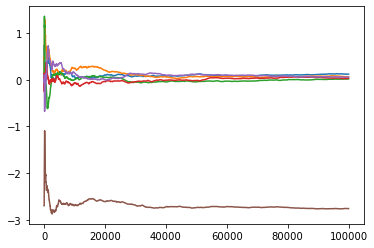

In [29]:
N_sources = 1
N_param = N_sources*3 + 3
freqs = np.linspace(100.e6,120.e6,num=N_freq)

true_params = np.array( [0.1 for i in range(3*N_sources)] + [0.103,0.103,-2.7])

noises = 1*np.ones(N_param)

data = vij(convert2ptsrc(true_params[:-3]),np.array([0.103,0.103]),-2.7,freqs)


N_samples = 100000
x0 = true_params.copy()
#x0= np.random.randn(N_param)
#x0 = np.array([ 0.38134772, -0.86757306, -1.94934567,  0.10113457, -0.44721298,  0.67161797])
#x0 = np.array([-1.83737639, -0.50217849, -0.75563581,  0.52137695, -0.80662543, -1.43024877])
#x0 = [-0.74298625, -0.99365942,  1.80960019, -0.14157798, -0.28797843, -1.47160511]
#x0 = [0.27545148,  1.50590859, -0.65189926,  0.28222659,  0.52290337,  0.08621697]

#3 sources
#x0 = [-1.24943837, -1.09829935,  0.62142347, -0.27324101,  0.42340895,  0.11884106, -0.97892391, -1.76661545, -0.17932005, -0.87214182,  0.51950746, -0.5820503 ]
#x0 = [-2.0554686,   0.39467815,  1.744126,    0.75188428,  1.05923836,  1.17986967, 0.43040258, -0.99488885,  2.04249234, -0.88677747,  0.26201338,  0.23761598]

# 5 sources 
#x0 = [-1.92834171,  1.24697884,  0.29317982,  0.40617774, -0.8074221,  -1.38648665,-0.56695105, -0.14468361, -0.21396327,  1.69889144, -0.27005684, -1.09330417, 0.85655848,  0.66854026,  0.30763344, -0.66595566, -0.31887309, -0.46040381]

start = time.time()
samples = hmc(logprob, x0=x0, args=(freqs,true_params,noises,data,N_param), n_samples=N_samples)
print('Time needed to compute HMC: '+ str(time.time()-start) + ' s', flush=True)
print('initial conditions : '+str(x0))

X = np.linspace(1,N_samples,num=N_samples)

for i in range(N_param) :
    T = samples[:,i]

    S = np.cumsum(T,0)
    M = [S[i]/(i+1) for i in range(len(S))]
    
    plt.plot(X,M)

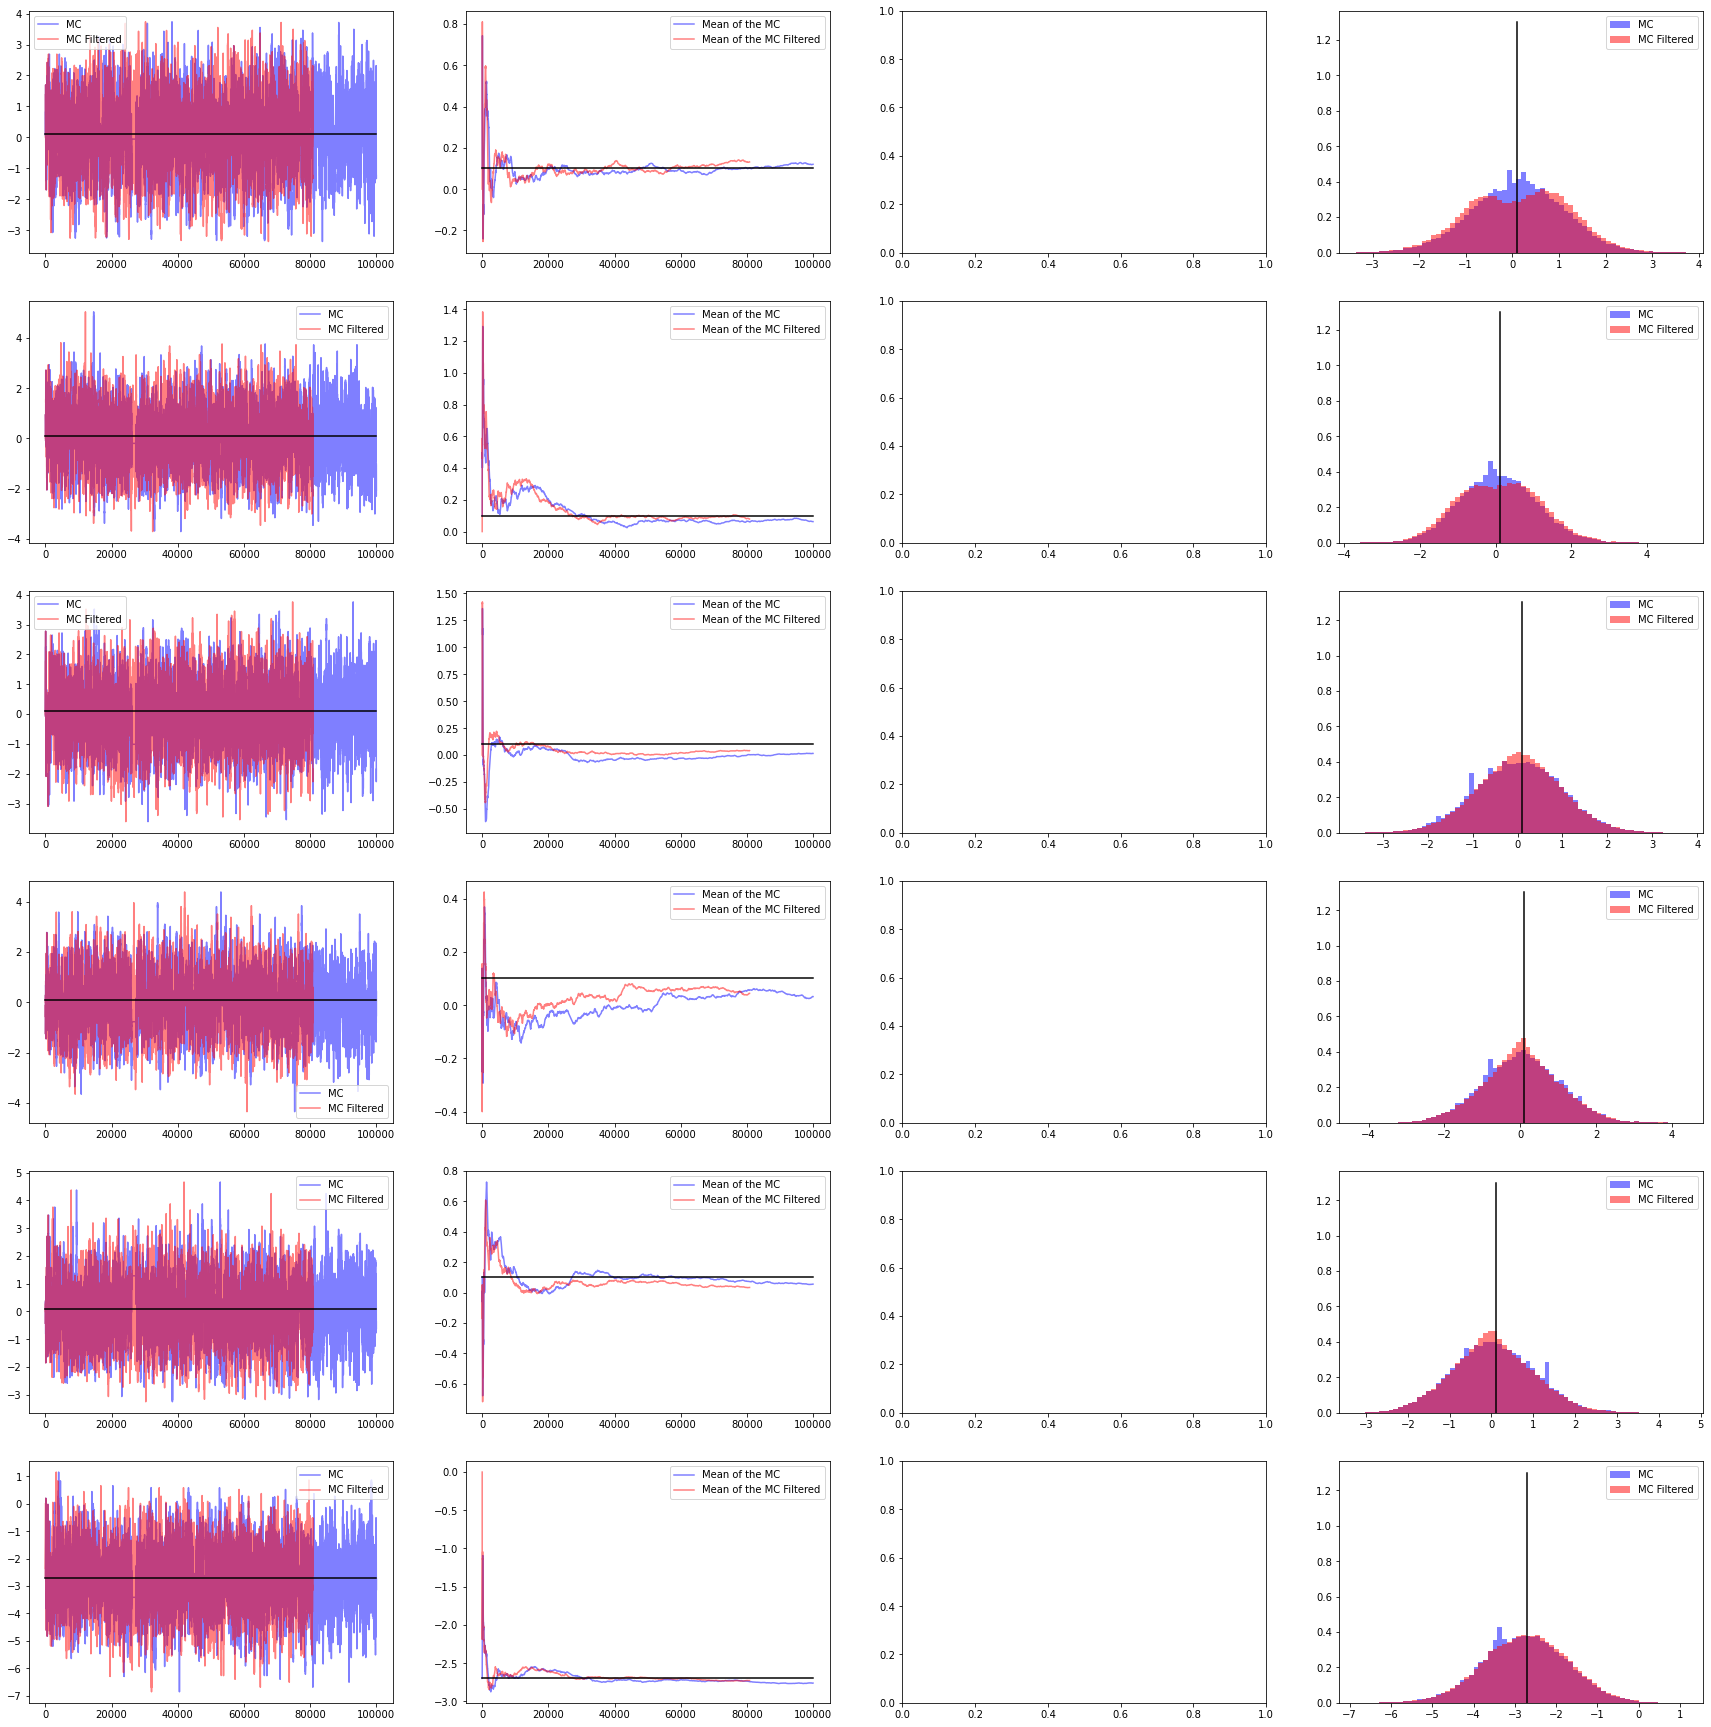

In [31]:
plt.rcParams['figure.constrained_layout.use'] = False

for i in range(N_param) :
    T = samples[:,i]
    
    R = [0]
    for el in T :
        if el != R[-1] :
            R += [el]

    S = np.cumsum(T,0)
    M = [S[i]/(i+1) for i in range(len(S))]
    Sr = np.cumsum(R,0)
    Mr = [Sr[i]/(i+1) for i in range(len(Sr))]
    
    
    #L = []
    #for xi in T :
    #    x = np.concatenate((true_params[:i], np.array([xi]), true_params[i+1:]))
    #    logp, grad = logprob(x, freqs, true_params, noises, data, N_param)
    #   L += [logp]

    plt.subplot(N_param,4,4*i+1)
    plt.plot(T,color='b',alpha=0.5,label='MC')
    plt.plot(R,color='r',alpha=0.5,label='MC Filtered')
    plt.plot([0.,N_samples],[true_params[i],true_params[i]],color='k')
    plt.legend()

    plt.subplot(N_param,4,4*i+2)
    plt.plot(M,color='b',alpha=0.5,label='Mean of the MC')
    plt.plot(Mr,color='r',alpha=0.5,label='Mean of the MC Filtered')
    plt.plot([0.,N_samples],[true_params[i],true_params[i]],color='k')
    plt.legend()
    
    plt.subplot(N_param,4,4*i+3)
    #plt.plot(L)
    #plt.legend()

    plt.subplot(N_param,4,4*i+4)
    benne = plt.hist(T, bins=70, density=True,color='b',alpha = 0.5,label='MC')
    benne = plt.hist(R, bins=70, density=True,color='r',alpha = 0.5,label='MC Filtered')
    plt.plot([true_params[i],true_params[i]],[0.,1.3],color='k')
    plt.legend()

plt.subplots_adjust(right=4,top=N_param)

In [10]:
def manual_gradient(y_value,x_range) :
    res = []
    N = len(y_value)
    for i in range(N-1):
        resi = (y_value[i+1]-y_value[i])/(x_range[i+1]-x_range[i])
        res += [resi]
        
    return res

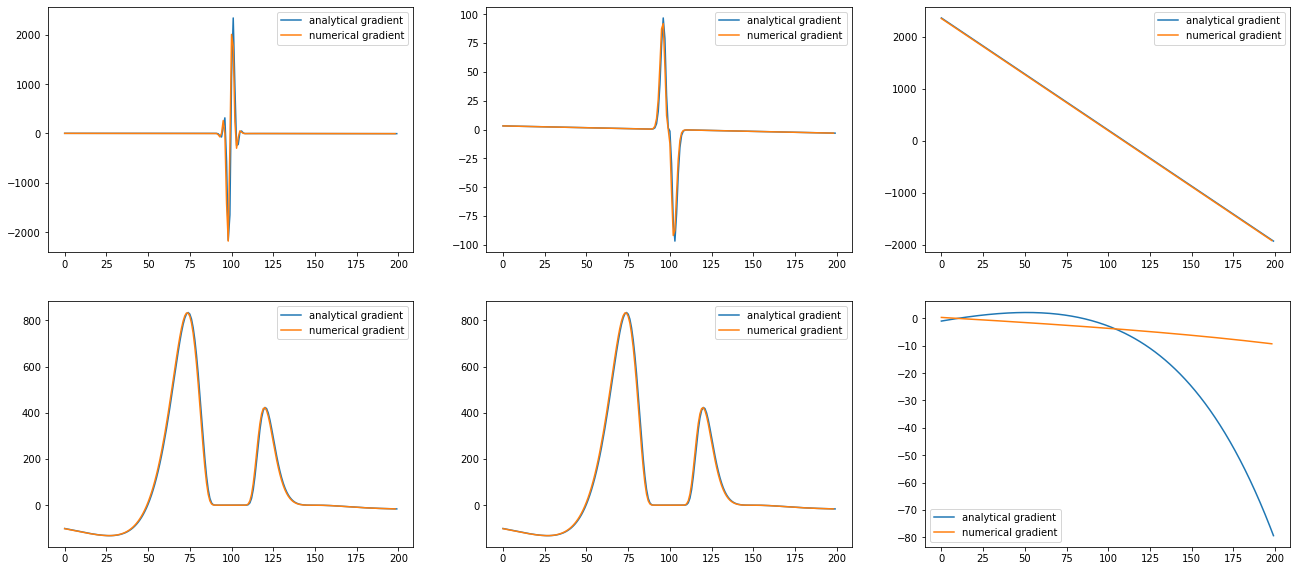

In [28]:
plt.rcParams['figure.constrained_layout.use'] = False

upper_value = [pi,pi,1.,0.2,0.2,3]

SIZE = 200

FREQS = np.linspace(100.e6,120.e6,num=100)
TRUE_PARAMS = np.array([0.1,0.,0.1,0.103,0.103,-2.7])
NOISES = 1*np.ones(6)
DATA = vij(np.array([[0.1,0.,0.1]]),np.array([0.103,0.103]),-2.7,FREQS)

for i in range(N_param) :
    x_range = np.linspace(-upper_value[i],upper_value[i],num=SIZE)
    y_value = []
    y_grad = []
    for xi in x_range :
        x = np.concatenate((TRUE_PARAMS[:i], np.array([xi]), TRUE_PARAMS[i+1:]))

        logp, grad = logprob(x, FREQS, TRUE_PARAMS, NOISES, DATA, N_param)
        
        y_value += [logp]
        y_grad += [grad[i]]
    
    #manual gradient
    y_grad_diff = manual_gradient(y_value,x_range)
        
        
    plt.subplot(2,3,i+1)
    plt.plot(y_grad,label='analytical gradient')
    plt.plot(y_grad_diff,label='numerical gradient')
    plt.legend()

plt.subplots_adjust(right=3,top=2)





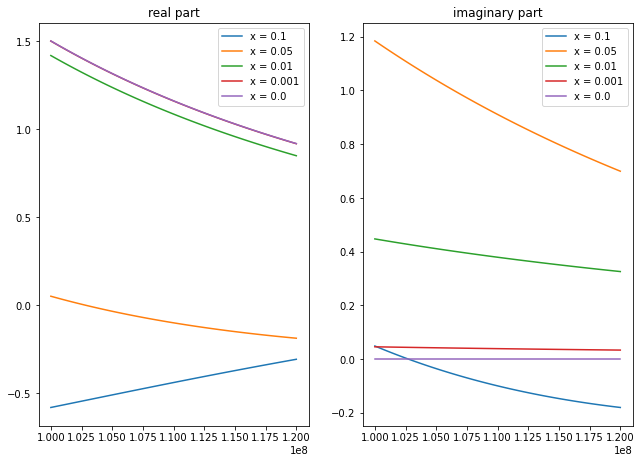

In [12]:
X_RES = np.linspace(-1.,1.,num=100)
Y_RES = []
Y_RES_GRAD = []

FREQS = np.linspace(100.e6,120.e6,num=100)
TRUE_PARAMS = np.array([0.1,0.,0.1,0.103,0.103,-2.7])
NOISES = 0.1*np.ones(6)
DATA = vij(np.array([[0.1,0.,0.1]]),np.array([0.103,0.103]),-2.7,FREQS)

x_a = np.array([0.1,0.,0.1,0.103,0.103,-2.7])
x_b = np.array([0.25,0.,0.1,0.103,0.103,-2.7])


Y_cr = vij(np.array([[0.11,0.,0.1]]), np.array([0.103,0.103]),-2.7,FREQS)[0]
Y_br = vij(np.array([[0.105,0.,0.1]]), np.array([0.103,0.103]),-2.7,FREQS)[0]
Y_ar = vij(np.array([[0.10,0.,0.1]]), np.array([0.103,0.103]),-2.7,FREQS)[0]
Y_dr = vij(np.array([[0.095,0.,0.1]]), np.array([0.103,0.103]),-2.7,FREQS)[0]
Y_er = vij(np.array([[0.09,0.,0.1]]), np.array([0.103,0.103]),-2.7,FREQS)[0]
Y_fr = vij(np.array([[0.0,0.,0.1]]), np.array([0.103,0.103]),-2.7,FREQS)[0]
Y_gr = vij(np.array([[-0.1,0.,0.1]]), np.array([0.103,0.103]),-2.7,FREQS)[0]
Y_hr = vij(np.array([[0.01,0.,0.1]]), np.array([0.103,0.103]),-2.7,FREQS)[0]
Y_ir = vij(np.array([[0.001,0.,0.1]]), np.array([0.103,0.103]),-2.7,FREQS)[0]
Y_jr = vij(np.array([[0.05,0.,0.1]]), np.array([0.103,0.103]),-2.7,FREQS)[0]

Y_ci = vij(np.array([[0.11,0.,0.1]]), np.array([0.103,0.103]),-2.7,FREQS)[1]
Y_bi = vij(np.array([[0.105,0.,0.1]]), np.array([0.103,0.103]),-2.7,FREQS)[1]
Y_ai = vij(np.array([[0.10,0.,0.1]]), np.array([0.103,0.103]),-2.7,FREQS)[1]
Y_di = vij(np.array([[0.095,0.,0.1]]), np.array([0.103,0.103]),-2.7,FREQS)[1]
Y_ei = vij(np.array([[0.09,0.,0.1]]), np.array([0.103,0.103]),-2.7,FREQS)[1]
Y_fi = vij(np.array([[0.0,0.,0.1]]), np.array([0.103,0.103]),-2.7,FREQS)[1]
Y_gi = vij(np.array([[-0.1,0.,0.1]]), np.array([0.103,0.103]),-2.7,FREQS)[1]
Y_hi = vij(np.array([[0.01,0.,0.1]]), np.array([0.103,0.103]),-2.7,FREQS)[1]
Y_ii = vij(np.array([[0.001,0.,0.1]]), np.array([0.103,0.103]),-2.7,FREQS)[1]
Y_ji = vij(np.array([[0.05,0.,0.1]]), np.array([0.103,0.103]),-2.7,FREQS)[1]

plt.rcParams['figure.constrained_layout.use'] = False
plt.subplot(1,2,1)
#plt.plot(FREQS,Y_er, label="x = 0.09")
#plt.plot(FREQS,Y_dr, label="x = 0.095")
#plt.plot(FREQS,Y_br, label="x = 0.105")
#plt.plot(FREQS,Y_cr, label="x = 0.11")
#plt.plot(FREQS,Y_gr, label="x = -0.1")
plt.plot(FREQS,Y_ar, label="x = 0.1")
plt.plot(FREQS,Y_jr, label="x = 0.05")
plt.plot(FREQS,Y_hr, label="x = 0.01")
plt.plot(FREQS,Y_ir, label="x = 0.001")
plt.plot(FREQS,Y_fr, label="x = 0.0")

plt.legend()
plt.title('real part')
plt.subplot(1,2,2)
#plt.plot(FREQS,Y_ei, label="x = 0.09")
#plt.plot(FREQS,Y_di, label="x = 0.095")
#plt.plot(FREQS,Y_bi, label="x = 0.105")
#plt.plot(FREQS,Y_ci, label="x = 0.11")
#plt.plot(FREQS,Y_gi, label="x = -0.1")
plt.plot(FREQS,Y_ai, label="x = 0.1")
plt.plot(FREQS,Y_ji, label="x = 0.05")
plt.plot(FREQS,Y_hi, label="x = 0.01")
plt.plot(FREQS,Y_ii, label="x = 0.001")
plt.plot(FREQS,Y_fi, label="x = 0.0")

plt.legend()
plt.title('imaginary part')
plt.subplots_adjust(bottom=0.1, right=1.5, top=1.5)

In [13]:
#N_param = 6
#freqs = np.linspace(100.e6,120.e6,num=N_freq)
#true_params = np.array([0.1,0.,0.1,0.103,0.103,-2.7])
#noises = 0.1*np.ones(N_param)
#data = vij(np.array([[0.1,0.,0.1]]),np.array([0.103,0.103]),-2.7,freqs)

In [14]:
#N_samples = 1000

#x0=np.random.randn(6)
#x0 = np.array([-1.83737639, -0.50217849, -0.75563581,  0.52137695, -0.80662543, -1.43024877])


#start = time.time()
#samples = hmc(logprob, x0=x0, args=(freqs,true_params,noises,data,N_param), n_samples=N_samples)
#print('Time needed to compute HMC: '+ str(time.time()-start) + ' s')

In [15]:
#X = np.linspace(1,N_samples,num=N_samples)
#param_name = ['theta_1','theta_2','flux S','sigma_1','sigma_2','beta']
#
#plt.rcParams['figure.constrained_layout.use'] = False
#true = [0.1,0.,0.103,0.103,0.1,-2.7]
#for i in range(6) :
#    T = samples[:,i]
#
#    S = np.cumsum(T,0)
#    M = [S[i]/(i+1) for i in range(len(S))]
#
#    Ssq = np.cumsum(T**2,0)
#    V = [Ssq[i]/(i+1) - S[i]/(i+1) for i in range(len(S))]
#    
#    plt.subplot(2,3,i+1)
#    plt.plot(X,M, label='mean of '+ param_name[i])
#    plt.plot([0.,N_samples],[true[i],true[i]], label='true_value')
#    plt.legend()
#
#plt.subplots_adjust(bottom=0.1, right=3, top=1.5)

In [16]:
#X = np.linspace(1,N_samples,num=N_samples)
#
#plt.rcParams['figure.constrained_layout.use'] = False
#true = [0.1,0.,0.103,0.103,0.1,-2.7]
#for i in range(6) :
#    plt.subplot(2,3,i+1)
#    plt.plot(X,samples[:,i], label=param_name[i])
#    plt.plot([0.,N_samples],[true[i],true[i]], label='true_value')
#    plt.legend()
#
#plt.subplots_adjust(bottom=0.1, right=3, top=1.5)

In [17]:
#plt.rcParams['figure.constrained_layout.use'] = False
#true = [0.1,0.,0.103,0.103,0.1,-2.7]
#for i in range(6) :
#    res = [0]
#    for el in samples[:,i] :
#        if el != res[-1] :
#            res += [el]
#  
#    plt.subplot(2,3,i+1)
#    plt.plot(res, label=param_name[i])
#    plt.plot([0.,len(res)],[true[i],true[i]], label='true_value')
#    plt.legend()
#
#plt.subplots_adjust(bottom=0.1, right=3, top=1.5)

In [18]:
#plt.rcParams['figure.constrained_layout.use'] = False
#true = [0.1,0.,0.103,0.103,0.1,-2.7]
#for i in range(6) :
#    res = [0]
#    for el in samples[:,i] :
#        if el != res[-1] :
#            res += [el]
#  
#    plt.subplot(2,3,i+1)
#    benne = plt.hist(samples[:,i],bins=50,density=True,color='b',alpha=0.5)
#    benne = plt.hist(res,bins=50,density=True,color='r',alpha=0.5)
#    plt.plot([true[i],true[i]],[0.,1.],label='True value')
#    plt.legend()
#
#plt.subplots_adjust(bottom=0.1, right=3, top=1.5)

In [19]:
#X = np.linspace(1,N_samples,num=N_samples)
#for i in range(6) :
#    T = samples[:,i]

#    S = np.cumsum(T,0)
#    M = [S[i]/(i+1) for i in range(len(S))]

#    Ssq = np.cumsum(T**2,0)
#    V = [Ssq[i]/(i+1) - S[i]/(i+1) for i in range(len(S))]
#    plt.plot(X,M, label='param n° : '+str(i+1))

#plt.legend()

In [20]:
#plt.rcParams['figure.constrained_layout.use'] = False
#plt.subplot(2,3,1)
#plt.title('1st coordinate of theta')
#benne = plt.hist(samples[:,0], bins=50, density=True)
#plt.subplot(2,3,2) 
#plt.title('2nd coordinate of theta')
#benne = plt.hist(samples[:,1], bins=50, density=True)
#plt.subplot(2,3,3)
#plt.title('sigma for 1st gaussian beam')
#benne = plt.hist(samples[:,2], bins=50, density=True)
#plt.subplot(2,3,4)
#plt.title('sigma for 2nd gaussian beam')
#benne = plt.hist(samples[:,3], bins=50, density=True)
#plt.subplot(2,3,5)
#plt.title('flux of the point source')
#benne = plt.hist(samples[:,4], bins=50, density=True)
#plt.subplot(2,3,6)
#plt.title('beta')
#benne = plt.hist(samples[:,5], bins=50, density=True)

#plt.subplots_adjust(bottom=0.1, right=3, top=1.5)